<a href="https://colab.research.google.com/github/hannielfls/segurancacomputacionaunb/blob/main/SegComp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabalho de Implementação

Gerador/Verificador de Assinaturas 

Implementar um gerador e verificador de assinaturas RSA em arquivos.
Assim, deve-se implementar um programa com as seguintes funcionalidades: 


---


Geração de chaves (mínimo de 1024 bits) 

*   Geração de chaves (mínimo de 1024 bits) 
*   Assinatura 

1.   Cálculo de hashes (função de hash SHA-3) 
2.   Assinatura da mensagem (cifração do hash)
2.   Formatação do resultado (caracteres especiais e informações para verificação) 

*   Verificação 

1.   Parsing do documento assinado (de acordo com a formatação usada
2.   Decifração da assinatura (decifração do hash) 
2.   Verificação (cálculo e comparação do hash do arquivo)  


---


Observações 1:

1.   Permite-se a utilização de bibliotecas públicas para aritmética modular e função de hash.
2.   Não é permitida a utilização de bibliotecas públicas, como OpenSSL, para primitivas de criptográficas de cifração e decifração assimétrica, e geração de chaves. 


---


Observações 2:

-> Implementarem  as seguintes primitivas;

*   geração de chaves com teste de primalidade (Miller-Rabin) 
*   cifração e decifração RSA
*   OAEP
*   Formatação/parsing







 












Biblioteca utilizadas:
 permite que randrange() manipular intervalos arbitrariamente grandes.


---
Observação 3:

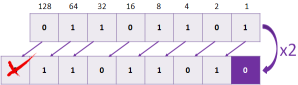

> bitwise operators 


No Python, os operadores bit a bit são usados para realizar cálculos bit a bit em inteiros. Os inteiros são primeiro convertidos em binários e, em seguida, as operações são realizadas bit a bit, daí o nome de operadores bit a bit.


Contextualização sobre criptografia e estonografia!


*   Cryptography

A criptografia trata de transformar uma mensagem em uma que seja legível apenas para aqueles com a chave certa. Todos os outros ainda podem ver a mensagem criptografada, mas não fará sentido para eles. Uma das primeiras formas de criptografia foi a cifra de substituição, como a cifra de César em homenagem a Júlio César. 

*   Steganography

A esteganografia é semelhante à criptografia porque também permite que você compartilhe mensagens secretas com o público desejado. No entanto, em vez de usar criptografia, ele esconde informações de forma inteligente em um meio que não atrai a atenção. Os exemplos incluem o uso de tinta invisível ou a escrita de um acróstico em que a primeira letra de cada palavra ou linha forma uma mensagem secreta



Contextualização sobre Criptografia Simétrica e Assimétrica



*   Criptografia Simétrica

O ciframento de uma mensagem (processo em que um conteúdo é criptografado) é baseado em 2 componentes (um algoritmo e uma chave de segurança). A criptografia simétrica faz uso de uma única chave, que é compartilhada entre o emissor e o destinatário de um conteúdo. Essa chave é uma cadeia própria de bits, que vai definir a forma como o algoritmo vai cifrar um conteúdo.

Como vantagem, a criptografia tem uma boa performance e a possibilidade de manter uma comunicação contínua entre várias pessoas simultaneamente. Caso a chave seja comprometida, basta efetuar a troca por uma nova, mantendo o algoritmo inicial

*   Criptografia Assimétrica

A criptografia assimétrica, também conhecida como criptografia de chave pública, é baseada em 2 tipos de chaves de segurança — uma privada e a outra pública. Elas são usadas para cifrar mensagens e verificar a identidade de um usuário.

Resumidamente falando, a chave privada é usada para decifrar mensagens, enquanto a pública é utilizada para cifrar um conteúdo. Assim, qualquer pessoa que precisar enviar um conteúdo para alguém precisa apenas da chave pública do seu destinatário, que usa a chave privada para decifrar a mensagem.

Esse sistema simples garante a privacidade dos usuários e aumenta a confiabilidade de uma troca de dados.


Contextualização sobre RSA e AES



1.   RSA

As chaves pública e privada são geradas com base na multiplicação de dois números primos. O resultado desta multiplicação será público mas, se o número for grande o suficiente, fatorar este número para descobrir os primos que multiplicamos para formá-lo pode demorar anos

2.   AES

O algoritmo descrito pelo AES é um algoritmo de chave simétrica, o que significa que a mesma chave é usada para criptografar e descriptografar os dados



In [ ]:
from random import getrandbits, randrange
from hashlib import sha3_512
from base64 import b64encode

config = dict()
config['BITS'] = 1024
config['MR_PROBABILITY'] = 20
config['e'] = 65537

#Miller-Rabin
def miller_rabin(a, s, d, n):
    a_to_power = pow(a, d, n)
    if a_to_power == 1:
        return True
    for i in range(s-1):
        if a_to_power == n - 1:
            return True
        a_to_power = (a_to_power * a_to_power) % n
    return a_to_power == n - 1

#Metodo utilizando a tecnica Miller-Rabin para verificar se o numero 'number' eh primo.
def is_prime(number):
    d = number - 1
    s = 0

    #Verifica se 'd' eh impar, se nao for executa um bitshift right e 's'
    while d % 2 == 0:
        d >>= 1
        s += 1

    #Repete o teste Miller-Rabin 'MR_PROBABILITY' vezes para probabilidade de 1-1/4**'MR_PROBABILITY' do numero 'number' ser primo
    for repeat in range(config['MR_PROBABILITY']):
        #Escolhe 'a' aleatoriamente dentro do range de 'number', exceto o numero 0
        a = 0
        while a == 0:
            a = randrange(number)

        #Se o teste falhar, eh numero composto
        if not miller_rabin(a, s, d, number):
            return False

    return True

#Metodo para gerar um numero primo aleatorio de n bits
def get_prime(nbits):
    while True:
        #Gera numero aleatorio 'number' com ate n bits.
        number = getrandbits(nbits)

        #Bitwise OR para aumentar a probabilidade do numero gerado 'number' ser primo
        #Seta o bit mais significativo para 1 garantindo n bits e numero alto.
        #Seta o bit menos significativo para 1 (impar), todo numero primo acima de 2 eh impar
        number |= 2**nbits | 1

        #Verifica se 'number' eh primo
        if is_prime(number):
            break
    return number

def gcd(e,t):
    if t == 0:
        return e
    else:
        return gcd(t,e%t)

def extend_euclid(a, b):
    if b == 0:
        return 1, 0, a
    else:
        x, y, q = extend_euclid(b, a % b)
        return y, x - (a // b) * y, q


def modinv(a, b):
    x, y, q = extend_euclid(a, b)
    if q != 1:
        return None
    else:
        return x % b

def generate_RSA_keys():
    #Numero primo 'p' de n bits
    p = get_prime(config['BITS']//2)

    #Numero primo 'q' de n bits diferente de 'p'
    while True:
        q = get_prime(config['BITS']//2)
        if q != p:
            break

    #RSA Modulus 'n'
    n = p * q

    t = ( p - 1 ) * ( q - 1 )

    for e in range(config['e'],t):
        if gcd(e,t)==1:
            break

    d = modinv(e, t)

    public_key = {'n' : n, 'e': e}
    private_key = {'n' : n, 'd': d}

    #print("Public Key: {}".format(public_key))
    #print("Private Key: {}\n".format(private_key))

    return (public_key, private_key)

def sign_message(mensagem, private_key):
    #Mensagem/informacao para ser assinada
    mensagem = b64encode(mensagem.encode())

    #Hash da mensagem de 512bits para caber na assinatura de 1024bits
    hash = int.from_bytes(sha3_512(mensagem).digest(), byteorder='big')

    #Assinatura com a chave privada
    assinatura = pow(hash, private_key['d'], private_key['n'])

    return (hash, assinatura)

def verify_signature(hash, assinatura, public_key):
    #Retorno da assinatura para o hash da mensagem original para posterior comparacao e validacao da assinatura
    hash_assinatura = pow(assinatura, public_key['e'], public_key['n'])

    if hash == hash_assinatura:
        return True
    return False

def main():

    #Gerar as chaves RSA publica e privada
    (public_key, private_key) = generate_RSA_keys()

    #Mensagem para assinar
    mensagem = "Mensagem secreta 1, 2, 3 !!!"

    #Assinar mensagem gerando o hash e a assinatura
    (hash, assinatura) = sign_message(mensagem, private_key)

    print("Mensagem para assinar: {}\n".format(mensagem))
    print("Hash da mensagem: {}\n".format(hex(hash)))
    print("Assinatura: {}\n".format(hex(assinatura)))
    print("Validade da assinatura: {}".format(verify_signature(hash, assinatura, public_key)))

if __name__ == '__main__':
    main()


Mensagem para assinar: Mensagem secreta 1, 2, 3 !!!

Hash da mensagem: 0xa8c6fc24420af32913cbb3449bcaf135c1537660d921235be50a805274328484e79bd81915dfed472a9f31b23482869cfb6cae602fe591403105d89fdf0a593a

Assinatura: 0x2628456b77738d83afafa6dde1a90165e85405aa3dc7d8ccd2411e941c83acb68c669876d16912e8d0137614edcf4af0ff4e773ba523cfe6b0de48c3100ef0d752520a0aa598dfe4049e18cbaf3e5ff3af5228855f4e1e9bc703c31e24bcca3a974d91f9df1029270221139ed32b7476de739eebbc6e379144696f7901c0c43e

Validade da assinatura: True
